In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../../data/processed/WESAD/feature_extracted/30s/data_with_focus.csv', index_col=0)

In [3]:
df.head()

,ACC_x_mean,ACC_y_mean,ACC_z_mean,net_acc_mean,net_acc_std,EDA_mean,EDA_std,EDA_slope,RESP_rate,RESP_regularity,HR,IBI,RMSSD,SDNN,pNN50,lf/hf,label,subject,focus_label
0,37.715333,-35.027333,-9.694000,62.840001,5.214880,0.630601,0.026678,-0.000766,17.748666,1.755023,75.081294,847.426471,226.949936,186.465391,93.939394,1.475494,1,8,1
1,39.252000,-47.664667,7.822000,62.549339,0.544205,0.563131,0.014406,-0.000412,21.083279,1.630067,63.966173,958.669355,213.058396,133.561891,90.000000,5.933398,1,8,1
2,39.628667,-46.246667,9.764000,62.469299,1.120992,0.523506,0.009367,-0.000265,21.327375,1.591487,66.372243,911.132812,134.469912,80.095987,74.193548,44.207315,1,8,1
3,38.927333,-48.439333,6.083333,62.442314,0.428267,0.520051,0.018623,0.000048,22.168906,1.352590,78.588847,803.631757,159.088795,155.426060,58.333333,707.930928,1,8,1
4,38.919333,-47.006667,-0.914667,62.576766,1.166077,0.493109,0.007353,-0.000203,24.011434,1.809602,65.088073,940.020161,199.098718,134.709634,63.333333,6.149627,1,8,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1075 entries, 0 to 1074
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ACC_x_mean       1075 non-null   float64
 1   ACC_y_mean       1075 non-null   float64
 2   ACC_z_mean       1075 non-null   float64
 3   net_acc_mean     1075 non-null   float64
 4   net_acc_std      1075 non-null   float64
 5   EDA_mean         1075 non-null   float64
 6   EDA_std          1075 non-null   float64
 7   EDA_slope        1075 non-null   float64
 8   RESP_rate        1075 non-null   float64
 9   RESP_regularity  1075 non-null   float64
 10  HR               1075 non-null   float64
 11  IBI              1075 non-null   float64
 12  RMSSD            1075 non-null   float64
 13  SDNN             1075 non-null   float64
 14  pNN50            1075 non-null   float64
 15  lf/hf            1075 non-null   float64
 16  label            1075 non-null   int64  
 17  subject          10

## Outlier detection

In [5]:
features = ['HR', 'EDA_mean', 'RMSSD', 'RESP_rate', 'net_acc_mean']

In [7]:
mask = pd.Series(True, index=df.index)

In [8]:
for subject in df['subject'].unique():
    for label in df['label'].unique():
        sub_df = df[(df['subject'] == subject) & (df['label'] == label)]
        for feature in features:
            q1 = sub_df[feature].quantile(0.25)
            q3 = sub_df[feature].quantile(0.75)
            iqr = q3 - q1
            lower = q1 - 1.5 * iqr
            upper = q3 + 1.5 * iqr
            outlier_mask = (df['subject'] == subject) & (df['focus_label'] == label) & (
                (df[feature] < lower) | (df[feature] > upper))
            mask[outlier_mask] = False


In [9]:
df = df[mask].reset_index(drop=True)

In [10]:
df

,ACC_x_mean,ACC_y_mean,ACC_z_mean,net_acc_mean,net_acc_std,EDA_mean,EDA_std,EDA_slope,RESP_rate,RESP_regularity,HR,IBI,RMSSD,SDNN,pNN50,lf/hf,label,subject,focus_label
0,39.252000,-47.664667,7.822000,62.549339,0.544205,0.563131,0.014406,-0.000412,21.083279,1.630067,63.966173,958.669355,213.058396,133.561891,90.000000,5.933398,1,8,1
1,39.628667,-46.246667,9.764000,62.469299,1.120992,0.523506,0.009367,-0.000265,21.327375,1.591487,66.372243,911.132812,134.469912,80.095987,74.193548,44.207315,1,8,1
2,38.927333,-48.439333,6.083333,62.442314,0.428267,0.520051,0.018623,0.000048,22.168906,1.352590,78.588847,803.631757,159.088795,155.426060,58.333333,707.930928,1,8,1
3,38.919333,-47.006667,-0.914667,62.576766,1.166077,0.493109,0.007353,-0.000203,24.011434,1.809602,65.088073,940.020161,199.098718,134.709634,63.333333,6.149627,1,8,1
4,49.157333,-18.907333,31.472000,62.762208,1.500866,0.470519,0.010338,-0.000283,20.909046,1.358827,65.761617,924.316406,145.875330,94.891277,54.838710,1.541767,1,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,46.964000,-8.760000,-7.498667,63.226677,2.985640,1.290620,0.053588,0.000966,23.230088,1.451065,81.961468,774.259868,238.947514,170.587935,70.270270,4.036088,2,15,0
940,33.698667,3.725333,49.853333,62.980308,2.770939,1.290599,0.020151,-0.000114,25.608455,2.211387,101.350382,641.304348,252.891267,181.866120,88.888889,1.921900,2,15,0
941,31.114000,4.294000,52.504667,62.972961,2.406421,1.332025,0.031676,0.000495,24.847170,1.932891,90.927874,699.776786,207.303412,159.144898,68.292683,1.107406,2,15,0
942,28.826667,-17.737333,17.747333,63.635677,6.112821,1.373313,0.023374,0.000278,24.011434,1.701185,98.456919,655.539773,282.197210,195.836075,74.418605,15.788516,2,15,0


## Univariate analysis

In [15]:
features = ['HR', 'RMSSD', 'SDNN', 'pNN50', 'lf/hf', 'EDA_mean', 'RESP_rate', 'net_acc_mean']

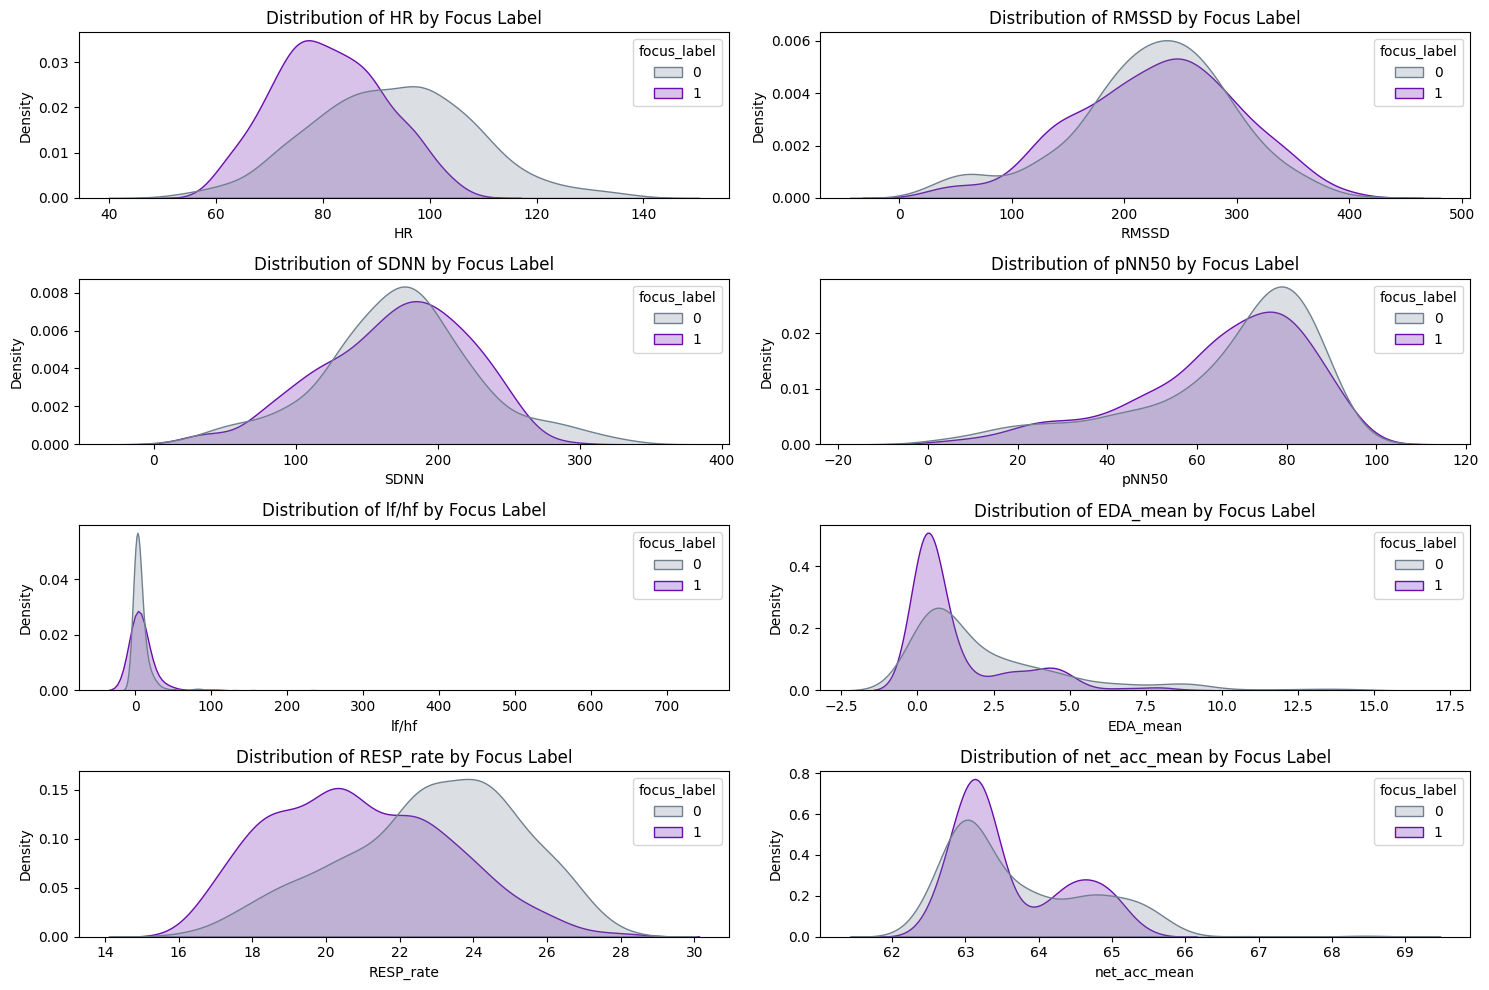

In [18]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(4, 2, i)
    sns.kdeplot(data=df, x=feature, hue='focus_label', common_norm=False, palette = {0: "#708090", 1: "#6A0DAD"}, fill=True)
    plt.title(f'Distribution of {feature} by Focus Label')
plt.tight_layout()
plt.show()

In [21]:
numeric_cols = df.select_dtypes(include=[np.number]).drop(columns=['focus_label', 'label', 'subject'])
corr = numeric_cols.corr()

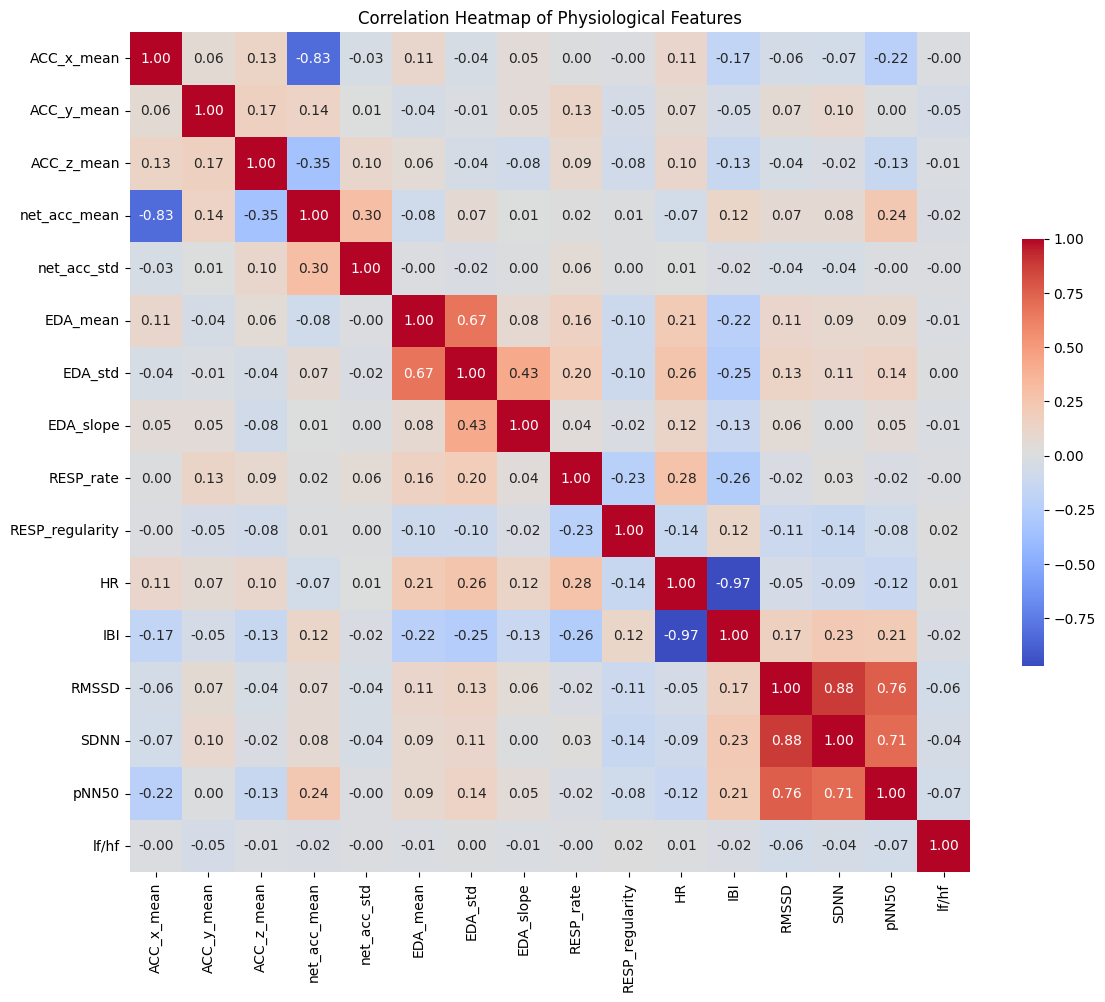

In [22]:

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={'shrink': 0.5})
plt.title("Correlation Heatmap of Physiological Features")
plt.tight_layout()
plt.show()

In [23]:
feature_pairs = [
    ('HR', 'EDA_mean'),
    ('HR', 'RMSSD'),
    ('RMSSD', 'RESP_rate'),
    ('net_acc_mean', 'HR')
]

In [34]:
colors = df['focus_label'].map({0: 'tab:blue', 1: 'tab:orange'})

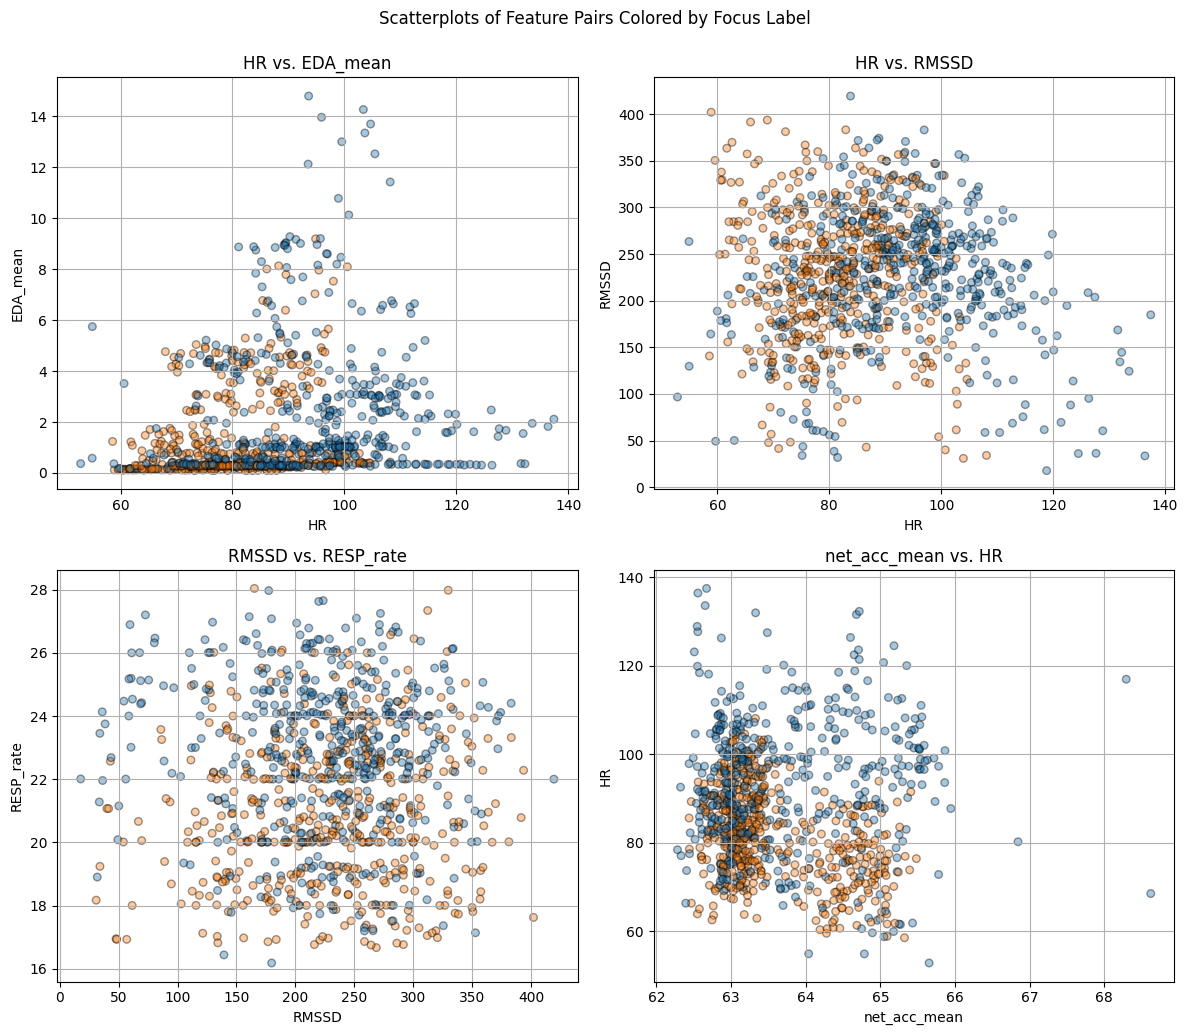

In [35]:
plt.figure(figsize=(12, 10))
for i, (f1, f2) in enumerate(feature_pairs, 1):
    plt.subplot(2, 2, i)
    plt.scatter(df[f1], df[f2], c=colors, alpha=0.4, edgecolor='k', s=30)
    plt.xlabel(f1)
    plt.ylabel(f2)
    plt.title(f'{f1} vs. {f2}')
    plt.grid(True)

plt.tight_layout()
plt.suptitle("Scatterplots of Feature Pairs Colored by Focus Label", y=1.03)
plt.show()

## Class imbalance check

In [36]:
df.value_counts('focus_label')

focus_label
0    480
1    464
Name: count, dtype: int64

## Feature-Label relationship

In [39]:
df.columns

Index(['ACC_x_mean', 'ACC_y_mean', 'ACC_z_mean', 'net_acc_mean', 'net_acc_std',
       'EDA_mean', 'EDA_std', 'EDA_slope', 'RESP_rate', 'RESP_regularity',
       'HR', 'IBI', 'RMSSD', 'SDNN', 'pNN50', 'lf/hf', 'label', 'subject',
       'focus_label'],
      dtype='object')

/var/folders/68/zr220k7d2xj94vd30c_16wtc0000gn/T/ipykernel_74411/803234620.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='focus_label', y=feature, palette='Set2')
/var/folders/68/zr220k7d2xj94vd30c_16wtc0000gn/T/ipykernel_74411/803234620.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='focus_label', y=feature, palette='Set2')
/var/folders/68/zr220k7d2xj94vd30c_16wtc0000gn/T/ipykernel_74411/803234620.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='focus_label', y=feature, palette='Set2')
/var/fo

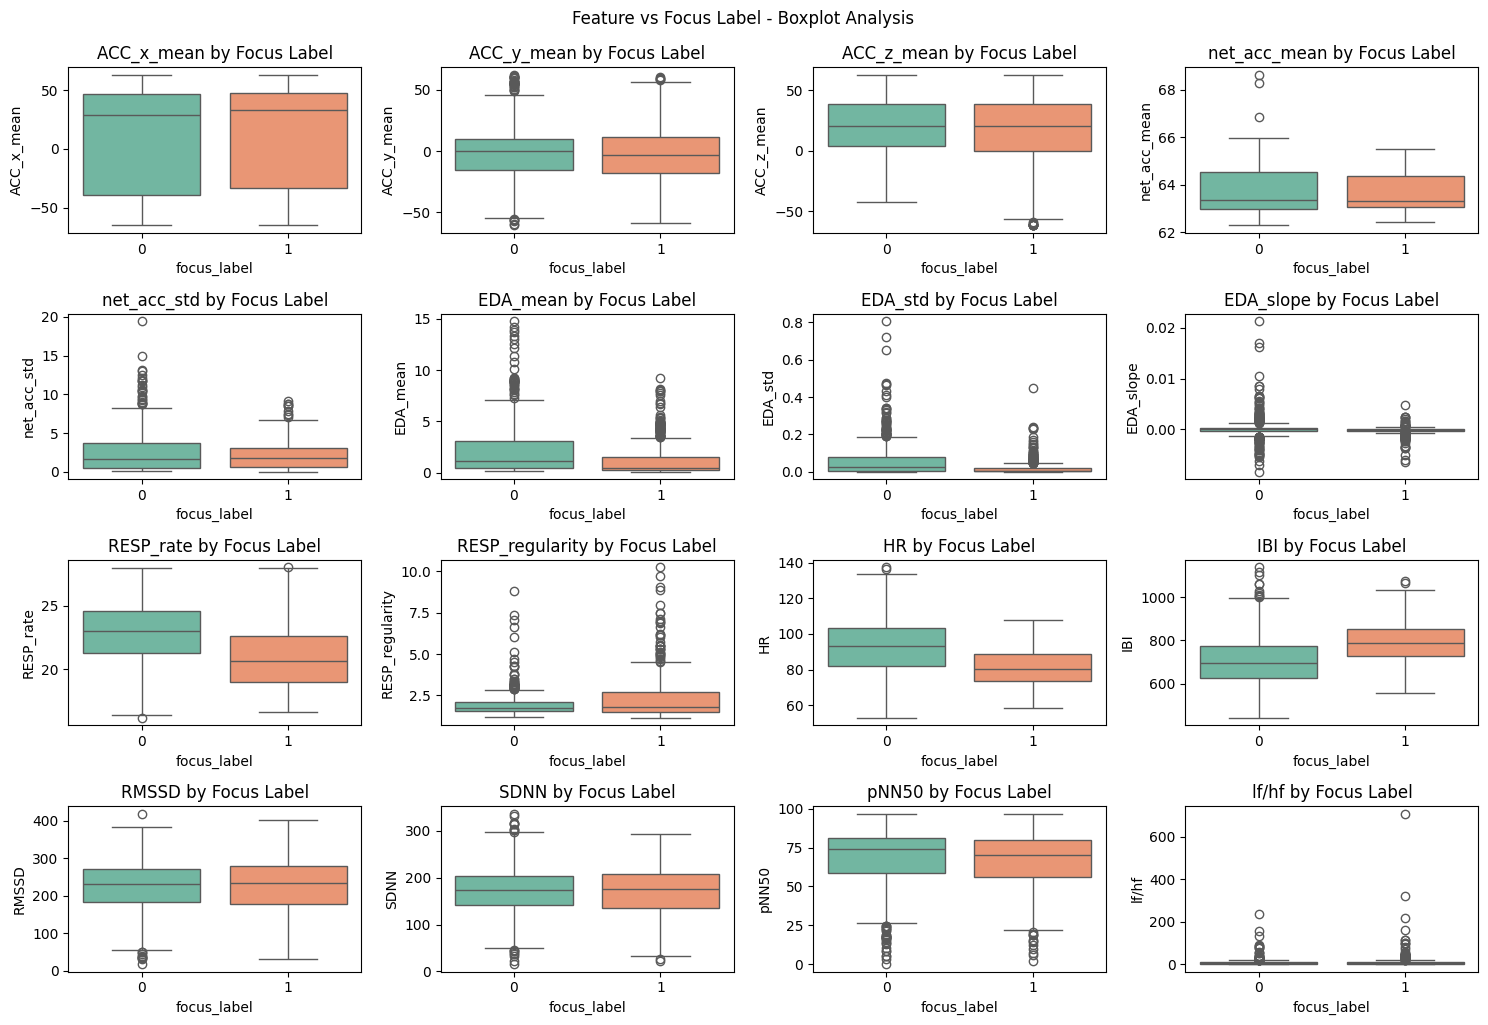

In [40]:
feature_list = ['ACC_x_mean', 'ACC_y_mean', 'ACC_z_mean', 'net_acc_mean', 'net_acc_std',
       'EDA_mean', 'EDA_std', 'EDA_slope', 'RESP_rate', 'RESP_regularity',
       'HR', 'IBI', 'RMSSD', 'SDNN', 'pNN50', 'lf/hf']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(feature_list, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(data=df, x='focus_label', y=feature, palette='Set2')
    plt.title(f'{feature} by Focus Label')
plt.tight_layout()
plt.suptitle("Feature vs Focus Label - Boxplot Analysis", y=1.02)
plt.show()